# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Setup Depeindencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from pprint import pprint

# import/hide api keys
from api_keys import api_key
api_key = f'APPID={api_key}'

# url for openweathermap 
url = 'http://api.openweathermap.org/data/2.5/weather?' + api_key
print(url)


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations based on a uniform distribution
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the total number for the city count in cities to to confirm sufficient count
len(cities)

606

In [8]:
# set list for city info
city_info = []

In [9]:
# print to log beginning of call
print("Beginning Data Retrieval")
print('------------------------')

# set counters
record_count = 1
set_count = 1

# loops through all cities in the list
# enumerate function adds a counter to an iterable and returns it 
# based on the object enumerated
for i, city in enumerate(cities):
    
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # create an endpoint url with each city    
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # log url, record and set numbers for the city data
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    
    # add 1 to the record counter
    record_count += 1
    
    # run an API request for each of the cities
    try:
          # parse the json and retrieve data
          city_weather = requests.get(city_url).json()
        
          # parse out the max temp, humidity, clouds, and wind speed
          city_lat = city_weather['coord']['lat']
          city_lng = city_weather['coord']['lng']
          city_max_temp = city_weather['main']['temp_max']
          city_humidity = city_weather['main']['humidity']
          city_clouds = city_weather['clouds']['all']
          city_wind = city_weather['wind']['speed']
          city_country = city_weather['sys']['country']
          city_date = city_weather['dt']
          
          # append information into a dataframe
          cityinfo.append({'City':city,
                          'Lats':city_lat,
                          'Lngs':city_lng,
                          'Temp':city_max_temp,
                          'Humidities':city_humidity,
                          'Cloudy':city_clouds,
                          'Wind':city_wind,
                          'Country':city_country,
                          'Date':city_date})
            
    # if an error is experienced skip it
    except:
          print('City not found. Skipping...')
          pass

# indicate when the load is complete
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=airai
City not found. Skipping...
Processing Record 2 of Set 1 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=maniitsoq
City not found. Skipping...
Processing Record 3 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=puerto%20ayora
City not found. Skipping...
Processing Record 4 of Set 1 | guarapari
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=guarapari
City not found. Skipping...
Processing Record 5 of Set 1 | mangrol
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=mangrol
City not found. Skipping...
Processing Record 6 of Set 1 | tuatapere
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e848

City not found. Skipping...
Processing Record 50 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=provideniya
City not found. Skipping...
Processing Record 0 of Set 2 | vanavara
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=vanavara
City not found. Skipping...
Processing Record 1 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=qaanaaq
City not found. Skipping...
Processing Record 2 of Set 2 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=saint-pierre
City not found. Skipping...
Processing Record 3 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=mar%20del%20plata
City not found. Skipping...
Processing Record 4 of Set 2 | port blair
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e848

City not found. Skipping...
Processing Record 49 of Set 2 | hatillo
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=hatillo
City not found. Skipping...
Processing Record 0 of Set 3 | samusu
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=samusu
City not found. Skipping...
Processing Record 1 of Set 3 | roswell
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=roswell
City not found. Skipping...
Processing Record 2 of Set 3 | talcahuano
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=talcahuano
City not found. Skipping...
Processing Record 3 of Set 3 | san patricio
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=san%20patricio
City not found. Skipping...
Processing Record 4 of Set 3 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=solnechnyy

City not found. Skipping...
Processing Record 0 of Set 4 | le pont-de-claix
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=le%20pont-de-claix
City not found. Skipping...
Processing Record 1 of Set 4 | paamiut
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=paamiut
City not found. Skipping...
Processing Record 2 of Set 4 | belushya guba
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=belushya%20guba
City not found. Skipping...
Processing Record 3 of Set 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=punta%20arenas
City not found. Skipping...
Processing Record 4 of Set 4 | chimbote
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=chimbote
City not found. Skipping...
Processing Record 5 of Set 4 | tougan
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a

City not found. Skipping...
Processing Record 0 of Set 5 | balakovo
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=balakovo
City not found. Skipping...
Processing Record 1 of Set 5 | pitimbu
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=pitimbu
City not found. Skipping...
Processing Record 2 of Set 5 | cocula
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=cocula
City not found. Skipping...
Processing Record 3 of Set 5 | conakry
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=conakry
City not found. Skipping...
Processing Record 4 of Set 5 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=longyearbyen
City not found. Skipping...
Processing Record 5 of Set 5 | vao
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=vao
City not found. Skip

City not found. Skipping...
Processing Record 1 of Set 6 | atamanovka
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=atamanovka
City not found. Skipping...
Processing Record 2 of Set 6 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=havre-saint-pierre
City not found. Skipping...
Processing Record 3 of Set 6 | rockport
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=rockport
City not found. Skipping...
Processing Record 4 of Set 6 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=ribeira%20grande
City not found. Skipping...
Processing Record 5 of Set 6 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=kysyl-syr
City not found. Skipping...
Processing Record 6 of Set 6 | harnosand
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f

City not found. Skipping...
Processing Record 1 of Set 7 | hermitage
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=hermitage
City not found. Skipping...
Processing Record 2 of Set 7 | umm ruwabah
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=umm%20ruwabah
City not found. Skipping...
Processing Record 3 of Set 7 | maksi
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=maksi
City not found. Skipping...
Processing Record 4 of Set 7 | socota
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=socota
City not found. Skipping...
Processing Record 5 of Set 7 | quelimane
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=quelimane
City not found. Skipping...
Processing Record 6 of Set 7 | novyy nekouz
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=novyy%20nekou

City not found. Skipping...
Processing Record 2 of Set 8 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=komsomolskiy
City not found. Skipping...
Processing Record 3 of Set 8 | aberdeen
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=aberdeen
City not found. Skipping...
Processing Record 4 of Set 8 | sulangan
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=sulangan
City not found. Skipping...
Processing Record 5 of Set 8 | teya
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=teya
City not found. Skipping...
Processing Record 6 of Set 8 | lolua
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=lolua
City not found. Skipping...
Processing Record 7 of Set 8 | rafai
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=rafai
City not found. Skippi

City not found. Skipping...
Processing Record 1 of Set 9 | nandigama
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=nandigama
City not found. Skipping...
Processing Record 2 of Set 9 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=quatre%20cocos
City not found. Skipping...
Processing Record 3 of Set 9 | makakilo city
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=makakilo%20city
City not found. Skipping...
Processing Record 4 of Set 9 | marawi
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=marawi
City not found. Skipping...
Processing Record 5 of Set 9 | shelburne
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=shelburne
City not found. Skipping...
Processing Record 6 of Set 9 | asha
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=a

City not found. Skipping...
Processing Record 1 of Set 10 | pisco
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=pisco
City not found. Skipping...
Processing Record 2 of Set 10 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=puerto%20del%20rosario
City not found. Skipping...
Processing Record 3 of Set 10 | areosa
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=areosa
City not found. Skipping...
Processing Record 4 of Set 10 | izumo
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=izumo
City not found. Skipping...
Processing Record 5 of Set 10 | yar-sale
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=yar-sale
City not found. Skipping...
Processing Record 6 of Set 10 | dingle
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=dingle


City not found. Skipping...
Processing Record 1 of Set 11 | ust-omchug
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=ust-omchug
City not found. Skipping...
Processing Record 2 of Set 11 | mareeba
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=mareeba
City not found. Skipping...
Processing Record 3 of Set 11 | maniwaki
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=maniwaki
City not found. Skipping...
Processing Record 4 of Set 11 | iranshahr
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=iranshahr
City not found. Skipping...
Processing Record 5 of Set 11 | lagoa
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=lagoa
City not found. Skipping...
Processing Record 6 of Set 11 | kerki
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=kerki
City not fou

City not found. Skipping...
Processing Record 1 of Set 12 | lieto
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=lieto
City not found. Skipping...
Processing Record 2 of Set 12 | vuktyl
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=vuktyl
City not found. Skipping...
Processing Record 3 of Set 12 | saleaula
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=saleaula
City not found. Skipping...
Processing Record 4 of Set 12 | zvishavane
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=zvishavane
City not found. Skipping...
Processing Record 5 of Set 12 | garissa
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=garissa
City not found. Skipping...
Processing Record 6 of Set 12 | burns lake
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=burns%20lake
City n

City not found. Skipping...
Processing Record 1 of Set 13 | amapa
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=amapa
City not found. Skipping...
Processing Record 2 of Set 13 | lekoni
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=lekoni
City not found. Skipping...
Processing Record 3 of Set 13 | te anau
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=te%20anau
City not found. Skipping...
Processing Record 4 of Set 13 | maymyo
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=maymyo
City not found. Skipping...
Processing Record 5 of Set 13 | fayaoue
http://api.openweathermap.org/data/2.5/weather?APPID=ce325497f350f9f79a464e8484b87013&q=fayaoue
City not found. Skipping...
-----------------------
Data Retrieval Complete
-----------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Base url for API call
url2 = 'http://api.openweathermap.org/data/2.5/weather?q=' 

# set information from the url API call into respective lists
New_Cities = []
Clouds = []
Countries = []
Humidities = []
Latitudes = []
Longitudes = []
Max_Temperatures = []
Wind_Speeds = []
Dates = []

# set forloop for the unique city for the different lng/lat of the cities data
for city in cities:
        
    Weather = requests.get(url2 + city + api_key).json()
        #pprint(Weather)
    
    if Weather['cod'] == 200:
        
        # append the information from the cities into the respective lists
        New_Cities.append(city)
            
        Cloudiness = Weather['clouds']['all']
        Clouds.append(Cloudiness)
    
        Country = Weather['sys']['country']
        Countries.append(Country)
    
        Humidity = Weather['main']['humidity']
        Humidities.append(Humidity)
    
        Lat = Weather['coord']['lat']
        Latitudes.append(Lat)
    
        Lng = Weather['coord']['lon']
        Longitudes.append(Lng)
    
        Max_Temp = Weather['main']['temp_max']
        Max_Temperatures.append(Max_Temp)
    
        Wind_Speed = Weather['wind']['speed']
        Wind_Speeds.append(Wind_Speed)
    
        Date = Weather['dt']
        Dates.append(Date)
        
# confirmation data retrieval is complete
print('Data Retrieval Complete')

Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [6]:
# using an f series, print the number of data points in the respective categories
print(f"cities: {len(New_Cities)}")
print(f"Clouds: {len(Clouds)}")
print(f"Countries: {len(Countries)}")
print(f"Humidities: {len(Humidities)}")
print(f"Latitudes: {len(Latitudes)}")
print(f"Longitudes: {len(Longitudes)}")
print(f"Max Temperatures: {len(Max_Temperatures)}")
print(f"Wind Speeds: {len(Wind_Speeds)}")
print(f"Dates: {len(Dates)}")

cities: 548
Clouds: 548
Countries: 548
Humidities: 548
Latitudes: 548
Longitudes: 548
Max Temperatures: 548
Wind Speeds: 548
Dates: 548


In [9]:
# build a datafram using a new title and adding the appended info from the lists
city_data = pd.DataFrame({'City': New_Cities,
                           'Cloudiness': Clouds,
                           'Country': Countries,
                           'Date' : Dates,
                           'Humidity': Humidities,
                           'Lat': Latitudes,
                           'Lng': Longitudes,
                           'Max Temp': Max_Temperatures,
                           'Wind Speed': Wind_Speeds})

city_data.head()

output_data_file = "output_data_file/city_data.csv"
city_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

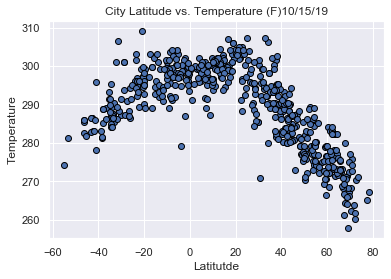

In [10]:
# set a scatterplot for the max temp
sns.set()
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", edgecolor='black', linewidth=1)

# Incorporate title, x and y label, and grids inth the graph properties
plt.title("City Latitude vs. Temperature (F)" + time.strftime('%x'))
plt.ylabel("Temperature")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

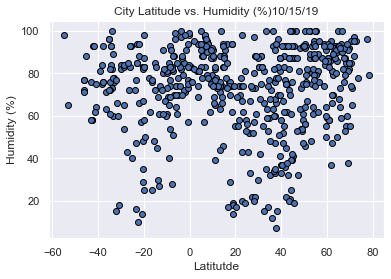

In [11]:
# set a scatter plot for the humidity of the cities
sns.set()
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", edgecolor='black', linewidth=1)

# Incorporate title, x and y label, and grids inth the graph properties
plt.title("City Latitude vs. Humidity (%)" + time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

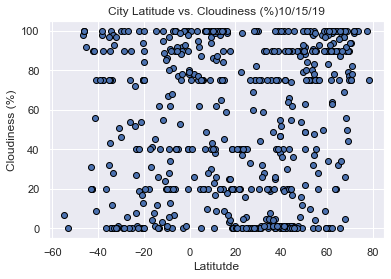

In [12]:
# set a scatter plot for the cloudiness of the cities
sns.set()
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", edgecolor='black', linewidth=1)

# Incorporate title, x and y label, and grids inth the graph properties
plt.title("City Latitude vs. Cloudiness (%)" + time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

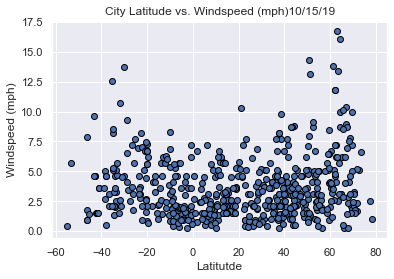

In [13]:
# set a scatter plot for the wind speed of the cities
sns.set()
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", edgecolor='black', linewidth=1)

# Incorporate title, x and y label, and grids inth the graph properties
plt.title("City Latitude vs. Windspeed (mph)" + time.strftime('%x'))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Windspeed.png")

# Show plot
plt.show()